In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df = pd.read_csv('Sales.csv')

In [ ]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


In [ ]:
df['Date'].dtypes

dtype('O')

In [ ]:
df.shape

(113036, 18)

In [ ]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [ ]:
df['Sub_Category'].unique()

array(['Bike Racks', 'Bike Stands', 'Bottles and Cages', 'Caps',
       'Cleaners', 'Fenders', 'Gloves', 'Helmets', 'Hydration Packs',
       'Jerseys', 'Mountain Bikes', 'Road Bikes', 'Shorts', 'Socks',
       'Tires and Tubes', 'Touring Bikes', 'Vests'], dtype=object)

In [ ]:
df.dtypes

Date                object
Day                  int64
Month               object
Year                 int64
Customer_Age         int64
Age_Group           object
Customer_Gender     object
Country             object
State               object
Product_Category    object
Sub_Category        object
Product             object
Order_Quantity       int64
Unit_Cost            int64
Unit_Price           int64
Profit               int64
Cost                 int64
Revenue              int64
dtype: object

In [ ]:
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Country'].unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [ ]:
df['Product_Category'].unique()

array(['Accessories', 'Clothing', 'Bikes'], dtype=object)

In [ ]:
df['Sub_Category'].unique()

array(['Bike Racks', 'Bike Stands', 'Bottles and Cages', 'Caps',
       'Cleaners', 'Fenders', 'Gloves', 'Helmets', 'Hydration Packs',
       'Jerseys', 'Mountain Bikes', 'Road Bikes', 'Shorts', 'Socks',
       'Tires and Tubes', 'Touring Bikes', 'Vests'], dtype=object)

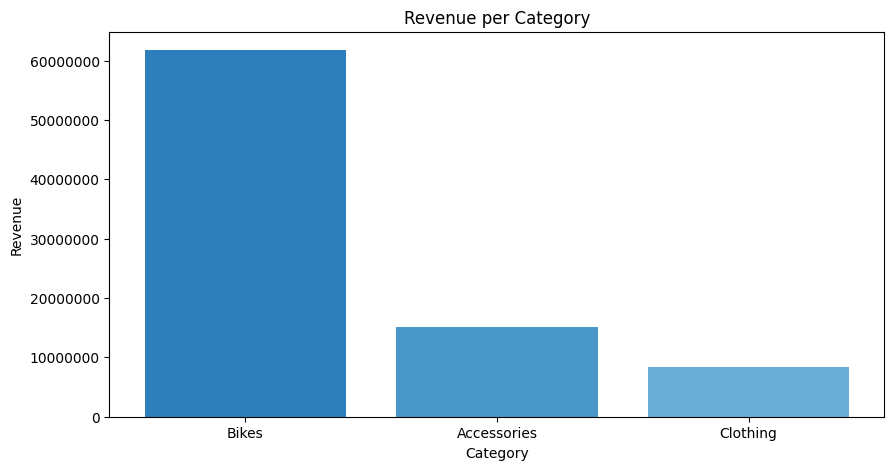

In [ ]:
Pr = df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False)
colors = plt.get_cmap('Blues')(np.linspace(0.7, 0.5, len(Pr)))
plt.figure(figsize=(10,5))
plt.bar(Pr.index, Pr.values, align='center', color=colors)
plt.xlabel('Category')
plt.ylabel('Revenue')
plt.title("Revenue per Category")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

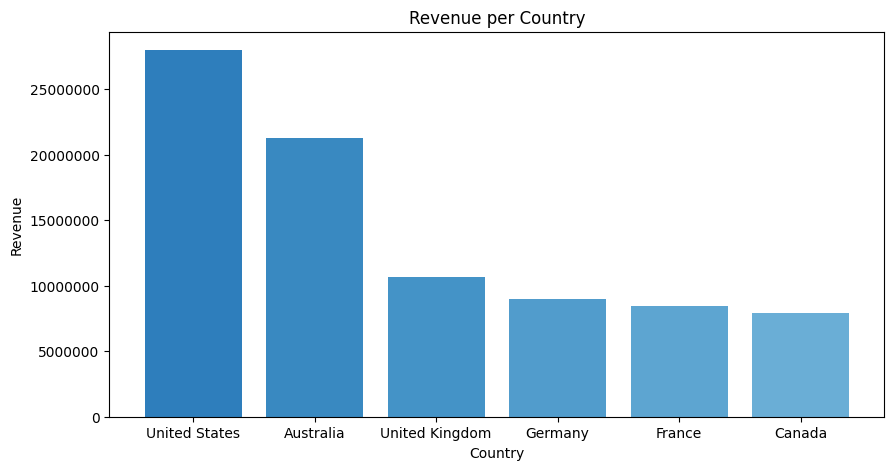

In [ ]:
CountryRevenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
colors = plt.get_cmap('Blues')
plt.figure(figsize=(10,5))
plt.bar(CountryRevenue.index, CountryRevenue.values, align='center', color=colors)
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title("Revenue per Country")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

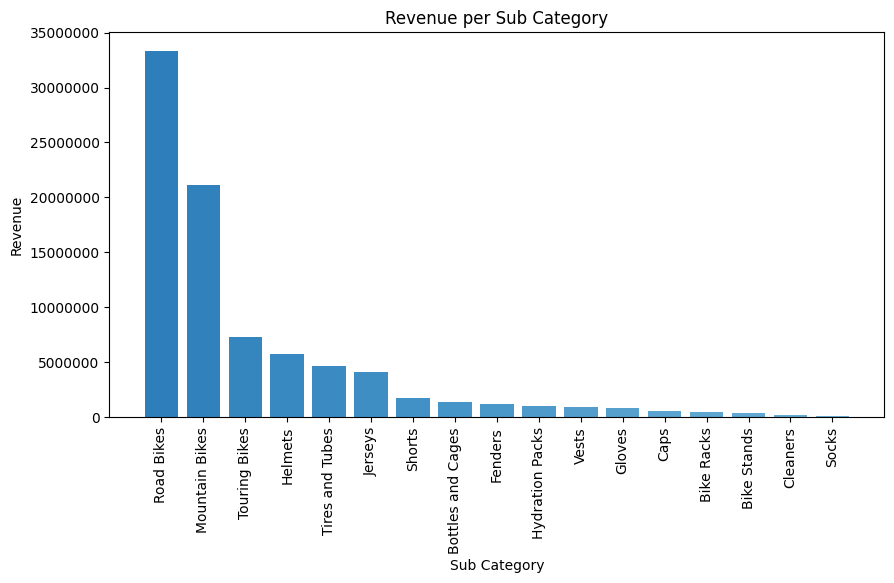

In [ ]:
SubRevenue = df.groupby('Sub_Category')['Revenue'].sum().sort_values(ascending=False)
colors = plt.get_cmap('Blues')
plt.figure(figsize=(10,5))
plt.bar(SubRevenue.index, SubRevenue.values, align='center', color=colors)
plt.xlabel('Sub Category')
plt.ylabel('Revenue')
plt.title("Revenue per Sub Category")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90)
plt.show()

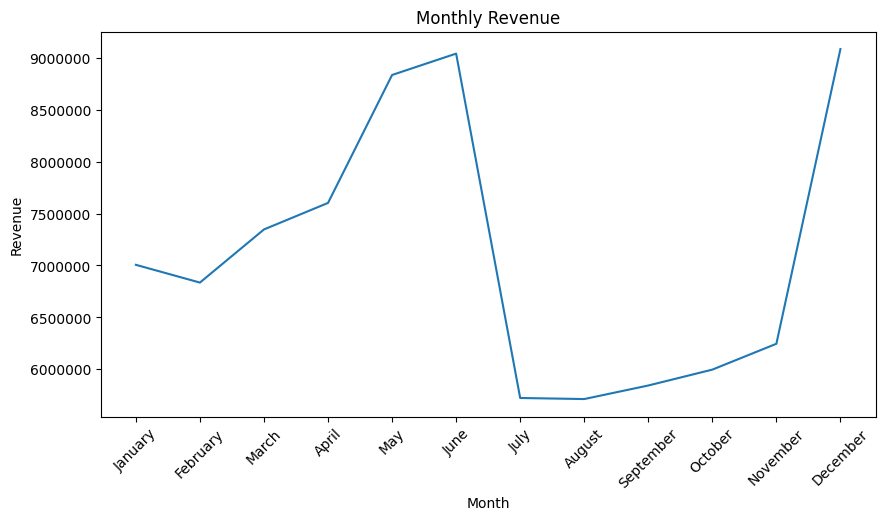

In [ ]:
Mr = df.groupby('Month')['Revenue'].sum()
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
col = {
    'Month' : Mr.index,
    'Revenue' : Mr.values
}
MonthRevenue = pd.DataFrame(col)
plt.figure(figsize=(10,5))
plt.plot(MonthRevenue.Month, MonthRevenue.Revenue)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title("Monthly Revenue")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)
plt.show()

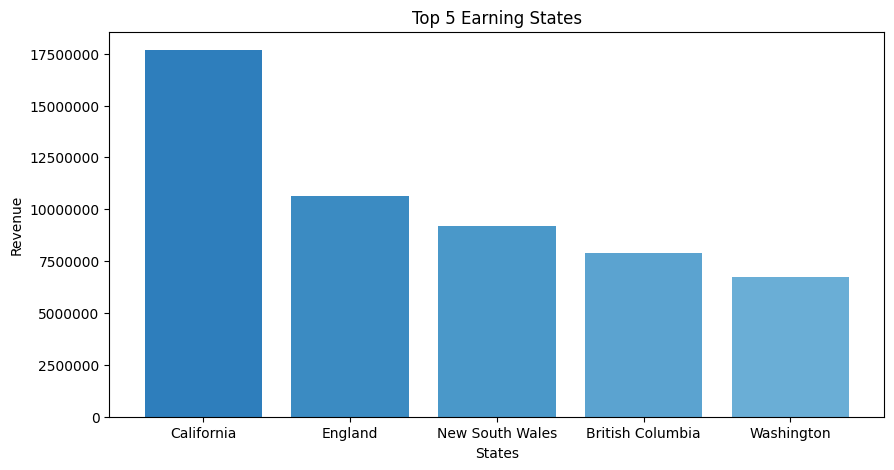

In [ ]:
StateRevenue = df.groupby('State')['Revenue'].sum().sort_values(ascending=False).head()
colors = plt.get_cmap('Blues')
plt.figure(figsize=(10,5))
plt.bar(StateRevenue.index, StateRevenue.values, align='center', color=colors)
plt.xlabel('States')
plt.ylabel('Revenue')
plt.title("Top 5 Earning States")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

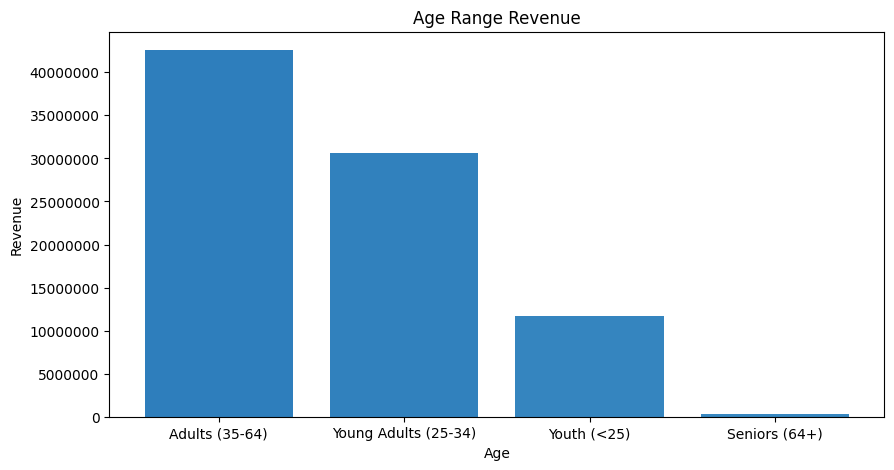

In [ ]:
Age = df.groupby('Age_Group')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.bar(Age.index, Age.values, align='center', color=colors)
plt.xlabel('Age')
plt.ylabel('Revenue')
plt.title("Age Range Revenue")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

In [ ]:
fig = px.pie(Age, color_discrete_sequence=px.colors.qualitative.Prism,names=Age.index, values = Age.values, width = 800, height = 500)
fig.show()